# Introducción a Matplotlib

[`Matplotlib`](https://matplotlib.org/gallery/index.html) es el módulo open source de creación de visualizaciones más famoso en Python, capaz de crear una gran variedad de gráficos diferentes y ofrecer control total sobre como queremos representar nuestros datos. 

Esta librería, además de permitir exportar los gráficos en diferentes formatos, esta pensada para integrarse perfectamente en jupyter notebooks y consolas como `IPython`.

Pese a haber diferentes formas de crear gráficos en `matplotlib`, este tutorial estara enfocado en el módulo `pyplot` de la librería matplotlib. Este módulo pretende ofrecer una interfaz simple con la que poder desarrollar rápidamente una gran variedad de gráficos de forma interactiva, de forma similar a la interfaz ofrecida por MATLAB.


## Index
1. **[Primeros pasos con plt.plot](#1.-Primeros-pasos-con-plt.plot)**

2. **[Configuración del gráfico](#2.-Configuración-del-gráfico)**
   * [2.1 Modificando el aspecto de los ejes](#2.1-Modificando-el-aspecto-de-los-ejes)
   * [2.2 Resaltando partes del gráfico](#2.2-Resaltando-partes-del-gráfico)
   * [2.3 Configurando el texto del gráfico](#2.3-Configurando-el-texto-del-gráfico)

3. **[Representando series de datos](#3.-Representando-series-de-datos)**
   * [3.1 plt.plot en profundidad](#3.1-plt.plot-en-profundidad)

4. **[Gráficos de barras](#4.-Gráficos-de-barras)**
   * [4.2 Histogramas](#4.2-Histogramas)

5. **[Gráficos 2D](#5.-Gráficos-2D)**
   * [5.1 Scatter Plots](#5.1-Scatter-Plots)
6. **[Ejercicios](#6.-Ejercicios)**
   * [6.1 Dibuja el precio histórico de bitcoin](#6.1-Dibuja-el-precio-histórico-de-bitcoin) 
   * [6.2 Scatter plot de longitudes de pétalo y sépalo](#6.2-Scatter-plot-de-longitudes-de-pétalo-y-sépalo)

## [1.](#Index) Primeros pasos con plt.plot

Empezaremos invocando el comando mágico [`%matplotlib`](https://ipython.readthedocs.io/en/stable/interactive/magics.html) para seleccionar el notebook como backend en el que visualizar los gráficos.

In [3]:
%matplotlib inline

In [4]:
import matplotlib.pyplot as plt
import numpy as np

Absolutamente todo lo que vamos a usar en este tutorial y que está relacionado con `matplotlib.pyplot` lo podréis encontrar documentado y detallado [aquí](http://matplotlib.sourceforge.net/api/pyplot_api.html#module-matplotlib.pyplot).

Para que quede claro desde un principio, las diferentes zonas de un gráfico donde se dibujaran cosás o sobre las que se interactuará serán:

<img src="images/05_01_mpl.jpeg" width="600px">




* `Figure`, que es una instancia de [`matplotlib.figure.Figure`](http://matplotlib.sourceforge.net/api/figure_api.html#matplotlib.figure.Figure). Y es la ventana donde irá el o los gráficos en sí:

* `Axes`, que es una instancia de [`matplotlib.axes.Axes`](http://matplotlib.sourceforge.net/api/axes_api.html#matplotlib.axes.Axes), que es el gráfico en sí donde se dibujará todo lo que le digamos y está localizada dentro de una figure.

* `Title`: Título del gráfico.

* `Line`: Línea que representa valores de una serie de datos.

* `Marker`: Símbolo que representa un punto en una serie de datos.

* `Grid`: Rejilla dibujada sobre el gráfico que ayuda a resaltar los valores de los ejes.

* `Major ticks`: Grupo de lineas equidistantes que representan valores en los ejes de coordenadas. La `grid` se ubica sobre ellos.

* `Major tick labels`: Texto que representa los valores de referencia en los `major ticks`.

* `Minor ticks`: Grupo de lineas equidistantes que representan valores en los ejes de coordenadas y que se ubican entre los `major ticks` suelen tener un tamaño mas pequeño que estos.

* `Minor tick labels`: Texto que representa los valores de referencia en los `minor ticks`.

* `X axis label`: Leyenda del eje x. Suele indicar el tipo de datos representado en este eje y las unidades con las que está representado.

* `Y axis label`: Leyenda del eje y. Suele indicar el tipo de datos representado en este eje y las unidades con las que está representado.

* `Legend`: Texto que contiene información sobre las series de datos representadas. Generalmente mapea el color y el tipo de marcador asignado a cada serie de datos representada.

* `Spines`: Líneas de contorno del gráfico.

Para lo primero (`figure`) usaremos la palabra ‘ventana’ mientras que para lo segundo (`axes`) usaremos la palabra ‘gráfico’.

Empezaremos este tutorial hablando de `pyplot.plot()`, una funcion que nos permite representar series de datos unidimensionales.

Para este tutorial utilizaremos la serie temporal de precios de Bitcoin al cierre de la sesión, así que vamos a cargar un DataFrame con los valores que utilizaremos para los gráfico de líneas.

In [5]:
import pandas as pd
bitcoin = pd.read_csv('data/BTC_USD.csv', parse_dates=[0], decimal=".", thousands=",")
bitcoin = bitcoin.sort_values("Date").iloc[300:-100:2] # Precio cada dos dias entre Aug 17 y Jun 18
bitcoin.index = np.arange(len(bitcoin["Date"])) # Reiniciamos los índices para que empiecen en 0
bitcoin.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2017-08-10,3407.9,3340.2,3444.4,3310.0,19.13K,2.04%
1,2017-08-12,3865.5,3643.4,3965.4,3590.0,37.66K,6.08%
2,2017-08-14,4319.5,4061.6,4330.3,3969.3,34.22K,6.57%
3,2017-08-16,4386.3,4160.0,4403.6,3928.1,35.29K,5.65%
4,2017-08-18,4090.2,4269.7,4359.0,3957.0,46.80K,-3.99%


In [6]:
import numpy as np
y = bitcoin["Price"].values
x = bitcoin.index.values

Por ejemplo, podemos representar los valores de dos arrays llamando a la función plot de la siguiente forma.

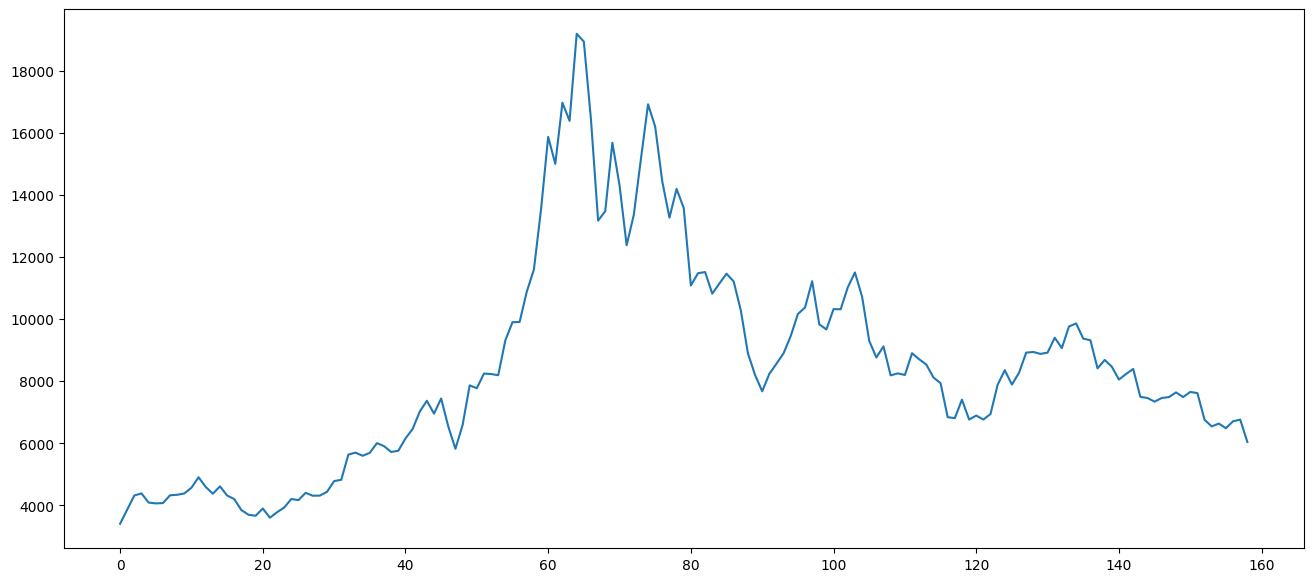

In [7]:
plt.figure(figsize=(16,7))
plt.plot(x, y)

En este caso hemos pasado como parámetros un `numpy` array y una `list`, pero también seria posible pasar como parámetro otros objetos como `tuples` o columnas de un `DataFrame`, como mostraremos a continuación.

`plt.plot()` Ofrece la posibilidad de customizar todos los atributos visuales del gráfico. Por ejemplo, si queremos cambiar el color de la linea dibujada o su grosor, es posible hacerlo modificando los parámetros `color` y `linewitdh` respectivamente.

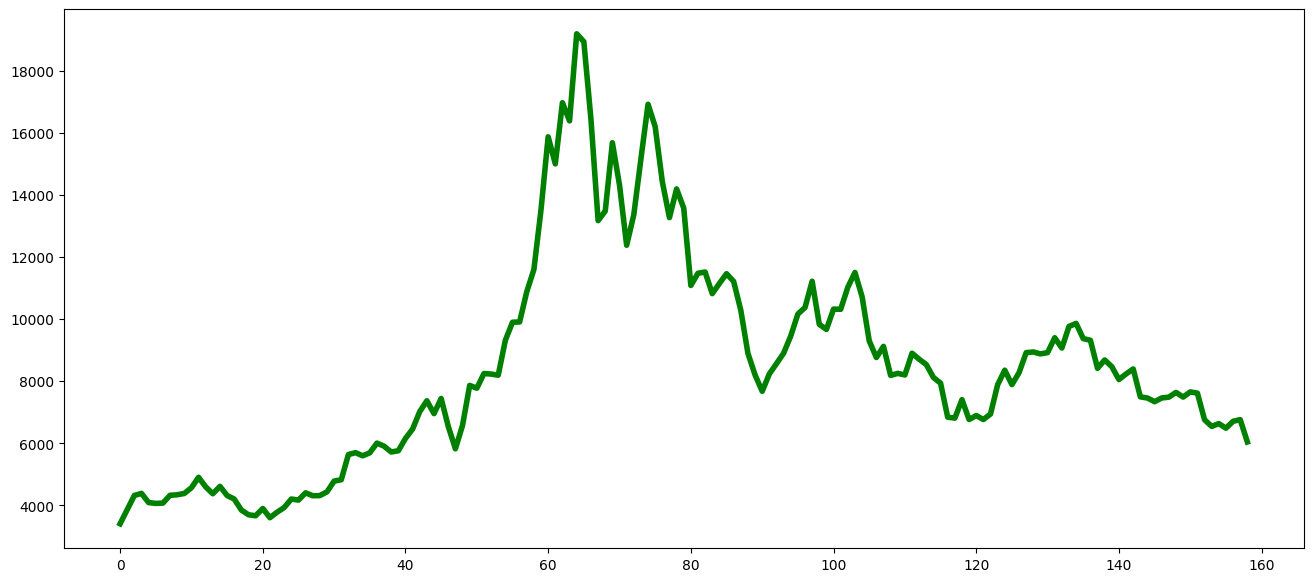

In [71]:
plt.figure(figsize=(16,7))
plt.plot(x, y, color="green", linewidth=4)

Otro de los aspectos que `plt.plot` permite configurar, es como se representan cada uno de los valores y las lineas que los unen. El parámetro `marker`[(ver referencia)](https://matplotlib.org/examples/lines_bars_and_markers/marker_reference.html) controla como se representan cada uno de los puntos, mientras que `linestyle`[(ver referencia)](https://matplotlib.org/gallery/lines_bars_and_markers/line_styles_reference.html) permite configurar como se muestras las uniones entre ellos.

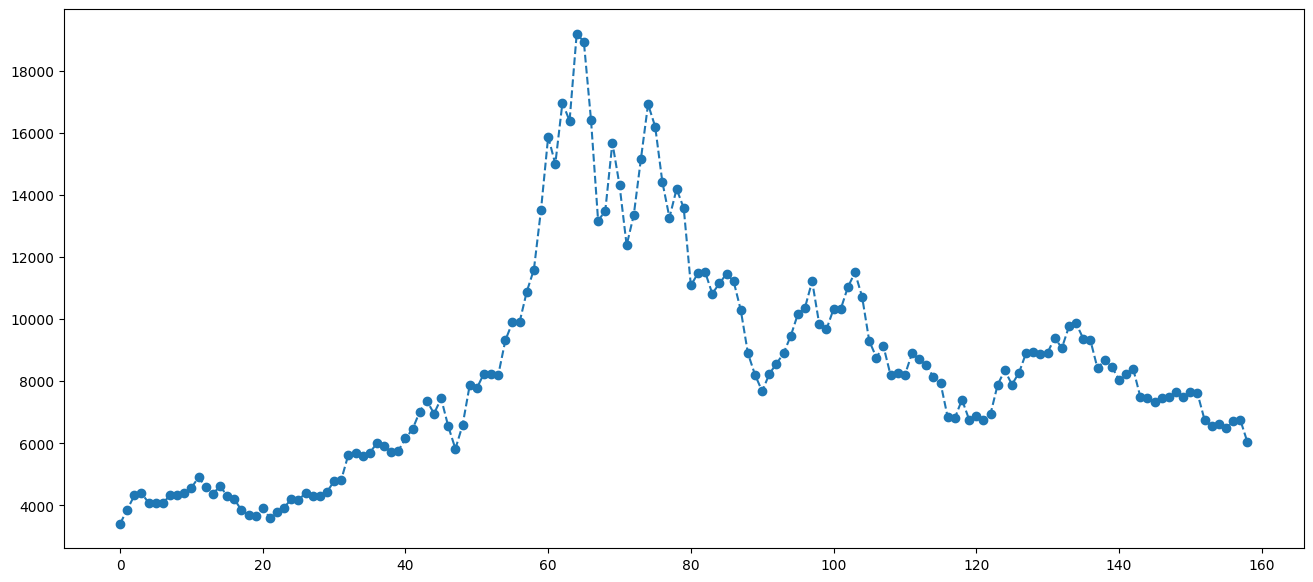

In [11]:
plt.figure(figsize=(16,7))
plt.plot(x, y, marker="o", linestyle="--")

## [2.](#Index) Configuración del gráfico

En esta sección explicaremos como modificar algunos aspectos visuales del gráfico. Si lo que queremos es modificar el tamaño de la ventana, vamos a modificar el parámetro `figsize` al crear una nueva ventana con `plt.figure`.

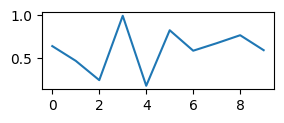

In [12]:
width = 3
height = 1
plt.figure(figsize=(width, height))
plt.plot(np.random.random(10))

### [2.1](#Index) Modificando el aspecto de los ejes

En los ejemplos de este tutorial, el área del gráfico es un espacio rectangular sobre el que representamos los datos.

Podemos colocar una rejilla que nos ayude a identificar mejor las áreas del gráfico mediante `plt.grid()` (en un gráfico polar deberemos usar `plt.rgrid()` y `plt.thetagrids()`).

Si os habéis fijado, `matplotlib` dibuja los ejes de forma que se ajusten al gráfico pero quizá eso no es lo que nos interese en algunos momentos, para ello podemos hacer uso de `plt.axis()`. Nos permite definir la longitud de los ejes, si queremos que aparezcan los mismos, si queremos que estos estén escalados,… 

Si solo nos interesa configurar uno de los ejes y dejar que el otro lo maneje `matplotlib` podemos usar `plt.xlim()`, `plt.xscale()`, `plt.ylim()` y `plt.yscale()`.

Si queremos dejar el eje x o el eje y con escala logarítmica podemos usar, respectivamente, `plt.semilogx()` o `plt.semilogy()`.

Podemos dibujar un segundo eje x o un segundo eje y usando `plt.twinx()` o `plt.twiny()`, respectivamente. También podemos establecer unos márgenes alrededor de los límites de los ejes usando `plt.margins()`. 

Por último, podemos etiquetar nuestros ejes con `plt.xlabel()` y `plt.ylabel()`. Veamos un ejemplo de algunas de estas cosas:

(-10.0, 110.0)

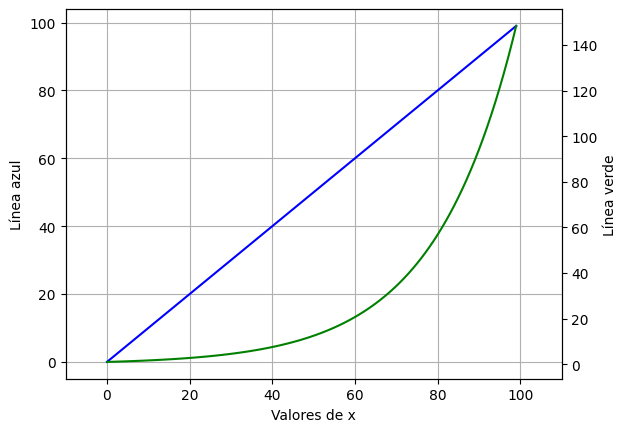

In [10]:
plt.plot(np.arange(100), 'b')  # Dibujamos una línea recta azul
plt.grid() #Activamos la rejilla
plt.xlabel('Valores de x')  # Ponemos etiqueta al eje x
plt.ylabel(u'Línea azul')  # Ponemos etiqueta al eje y
plt.twinx()  # Creamos un segundo eje y
plt.plot(np.exp(np.linspace(0,5,100)), 'g')  # Dibuja una exponencial de 0 a 5 con la y representada en el segundo eje y
plt.ylabel(u'Línea verde')  # Ponemos etiqueta al segundo eje y
plt.xlim(-10,110)  # Limitamos los valores del eje x para que vayan desde -10 a 110


### [2.2](#Index) Resaltando partes del gráfico

Ahora vamos a ver `plt.axvline()`, `plt.axvspan()`, `plt.axhline()`, `plt.axhspan()`. ¿Y para qué sirven estas 'cosas'? Pensad que, por ejemplo, queréis resaltar una zona de vuestro gráfico para focalizar la atención en esa área. Eso lo podríamos hacer usando lo anterior. 

- `plt.axvline()` y `plt.axhline()` dibujan líneas verticales y horizontales en la x o en la y que le digamos. 
- `plt.axvspan()` y `plt.axhspan()` dibujan recuadros entre las coordenadas x o y que queramos.

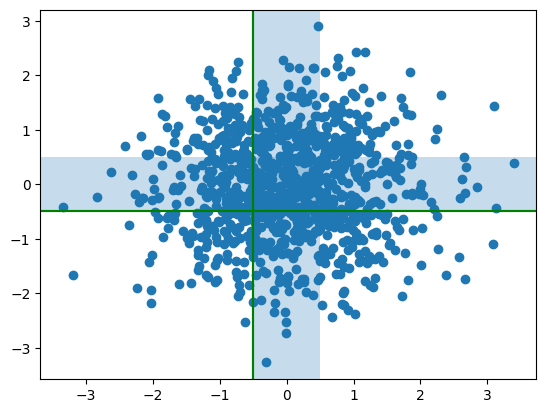

In [11]:
plt.scatter(np.random.randn(1000), np.random.randn(1000))  # Dibujamos un scatterplot de valores aleatorios
plt.axvline(-0.5, color='g')  # Dibujamos una línea vertical verde centrada en x = -0.5
plt.axvline(-0.5, color='g')  # Dibujamos una línea vertical verde centrada en x = 0.5
plt.axhline(-0.5, color='g')  # Dibujamos una línea horizontal verde centrada en x = -0.5
plt.axhline(-0.5, color='g')  # Dibujamos una línea horizontal verde centrada en x = 0.5
#  Dibujamos un recuadro azul vertical entre x[-0.5,0.5] con transparencia 0.25
plt.axvspan(-0.5,0.5, alpha=0.25) 
#  Dibujamos un recuadro azul horizontal entre x[-0.5,0.5] con transparencia 0.25
plt.axhspan(-0.5,0.5, alpha=0.25)  

### [2.3](#Index) Configurando el texto del gráfico

¿Y como podemos controlar el texto básico sobre el gráfico? Hay muchas formas de meter texto y controlar las etiquetas de forma básica y sencilla. En algunos momentos hemos visto `plt.legend()`, también existe `plt.figlegend()`. Yo siempre uso `plt.legend()` el 100% de las veces. Para usos avanzados podéis mirar [este enlace](http://stackoverflow.com/a/4701285) y este [otro enlace](http://matplotlib.sourceforge.net/users/legend_guide.html). 

Si queremos poner un título al gráfico podemos usar `plt.title()` y `plt.suptitle()`.

Si queremos poner título a los ejes podemos usar `plt.xlabel()` y `plt.ylabel()` para los ejes x e y, respectivamente. 

Por último, para controlar los valores de las etiquetas que se ponen sobre los ejes dispones de `plt.locator_params()`, `plt.minorticks_on()`, `plt.minorticks_off()`, `plt.tick_params()`, `plt.tick_label_format()`, `plt.xticks()` y `plt.yticks()`. 

Vamos a manejar la mayor parte de estas funciones mediante un ejemplo para que se vea más claro su uso. Imaginemos que queremos representar el valor medio diario de una variable durante un año, en el eje x queremos que aparezca solo los meses en el día del año en que empieza el mes.

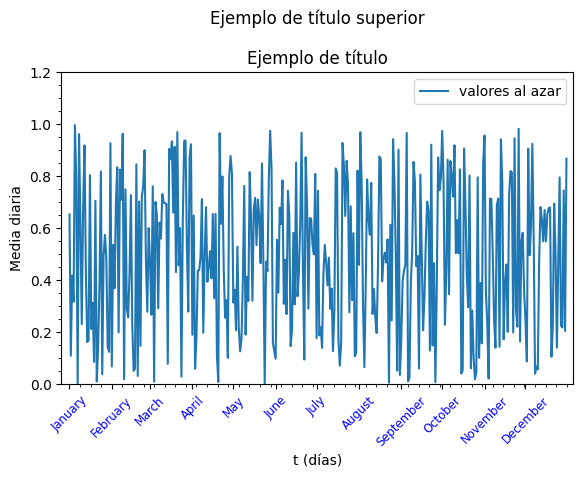

In [12]:
import calendar
# Para generar el lugar del primer días de cada mes en un año
dias = [np.array(calendar.mdays)[0:i].sum() + 1 for i in np.arange(12)+1]
meses = calendar.month_name[1:13]  # Creamos una lista con los nombres de los meses

plt.axes([0.1,0.2,0.8,0.65])
plt.plot(np.arange(1,366), np.random.rand(365), label = 'valores al azar')  # Creamos un plot con 365 valores

plt.xlim(-5,370)  # Los valores del eje y variarán entre -5 y 370
plt.ylim(0,1.2)  # Los valores del eje y variarán entre 0 y 1.2

plt.legend()  # Creamos la caja con la leyenda
plt.title(u'Ejemplo de título')  # Ponemos un título
plt.suptitle(u'Ejemplo de título superior')  # Ponemos un título superior
plt.xlabel(u't (días)')
plt.ylabel('Media diaria')

plt.minorticks_on()  # Pedimos que se vean subrayas de división en los ejes
# Colocamos las etiquetas, meses, en las posiciones, dias, con color azul y rotadas 45º
_ = plt.xticks(dias, meses, size = 'small', color = 'b', rotation = 45)  


## [3.](#Index) Representando series de datos

Hasta ahora hemos visto como configurar las ventanas, manejo de las mismas, definir áreas de gráfico,… Ahora vamos a ir viendo los diferentes tipos de gráficos que existen.

### [3.1](#Index) plt.plot en profundidad

Como habéis podido comprobar, en los ejemplos anteriores hemos estado viendo mucho `plt.plot()` que es lo que se suele usar para dibujar un gráfico simple de líneas representando los valores (x, f(x)). Ahora vamos a ver un ejemplo explicado para que veáis todas las posibilidades de `plt.plot()`.

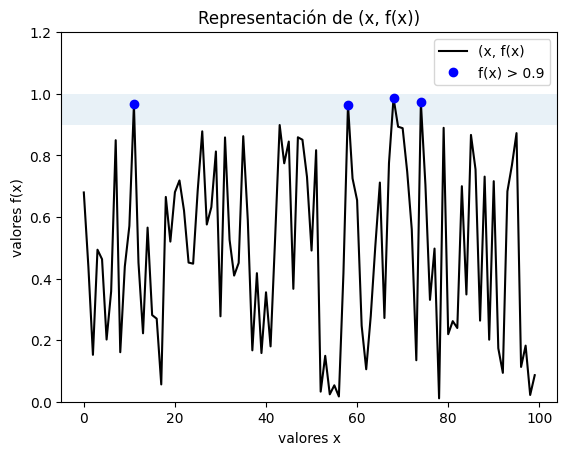

In [13]:
x = np.arange(100)  # Valores de x
y = np.random.rand(100)  # Valores de y

plt.plot(x,y, color = 'black', label = '(x, f(x)')  # Dibujamos la evolución de f(x), frente a x
# Destacamos los valores por encima de 0.9 colocándoles un marcador circular azul
plt.plot(x[y > 0.9], y[y > 0.9], 'bo', label = 'f(x) > 0.9')  
plt.axhspan(0.9, 1, alpha = 0.1)  # Colocamos una banda de color para los valores f(x) > 0.9
plt.ylim(0,1.2)  # Limitamos el eje x

plt.legend()  # Colocamos la leyenda
plt.title(u'Representación de (x, f(x))')  # Colocamos el título del gráfico
plt.xlabel('valores x')  # Colocamos la etiqueta en el eje x
_ = plt.ylabel('valores f(x)')  # Colocamos la etiqueta en el eje y

Este es el tipo de gráfico que suelo usar un 75% de las veces. Tipos de gráfico análogos a este son `plt.plot_date()`, que es similar a `plt.plot()` considerando uno o ambos ejes como fechas, y `plt.plotfile()`, que dibuja directamente desde los datos de un fichero.

## [4.](#Index) Gráficos de barras

Hasta ahora hemos visto como configurar las ventanas, manejo de las mismas, definir áreas de gráfico, algunos tipos de gráficos… Ahora vamos a continuar viendo tipos de gráficos disponibles desde `matplotlib.pyplot`. En este caso nos vamos a centrar en los gráficos de barras.

### [4.2](#Index) Histogramas

Para dibujar un [histograma](http://es.wikipedia.org/wiki/Histograma) podemos hacer uso de `plt.hist`. Un histograma suele ser un gráfico de barras donde se representa la ocurrencia de datos (frecuencia) en intervalos definidos. Lo que hace `plt.hist` es dibujar el histograma de un vector en función del número de intervalos (*bins*) que definamos. Como siempre, vamos a ver esto con un ejemplo de código a continuación. El resultado sería el siguiente, donde se representa el cálculo que haría la función [`np.histogram`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.histogram.html) gráficamente y en un solo paso:

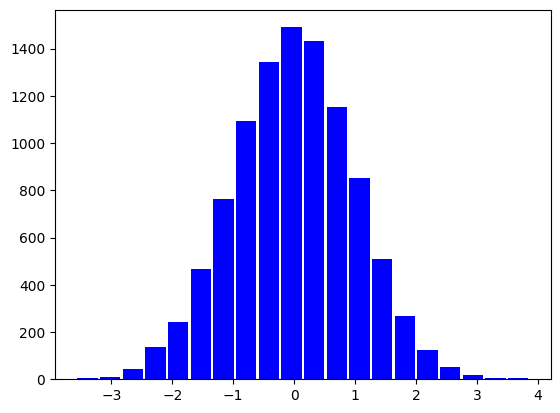

In [14]:
x = np.random.randn(10000)  # Definimos un vector de números aleatorios de una distribución normal
# Dibuja un histograma dividiendo el vector x en 20 intervalos del mismo ancho
_ = plt.hist(x, bins = 20, rwidth=0.9, histtype="barstacked", linewidth=1, color="blue")  

In [15]:
plt.hist?

Podéis jugar también con [`np.histogram2d`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.histogram2d.html#numpy.histogram2d), [`np.histogramdd`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.histogramdd.html#numpy.histogramdd) y [`np.bincount`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.bincount.html#numpy.bincount)

## [5.](#Index) Gráficos 2D

Matplotlib también ofrece la posibilidad de representar diferentes tipos de gráficos en los que comparar dos dimensiones diferentes de nuestros datos.

### [5.1](#Index) Scatter Plots

El scatter plot es el tipo de gráfico más usado para comparar dos series de datos. `plt.scatter` representa los puntos de intersección entre los valores de `x` e `y` seleccionados.

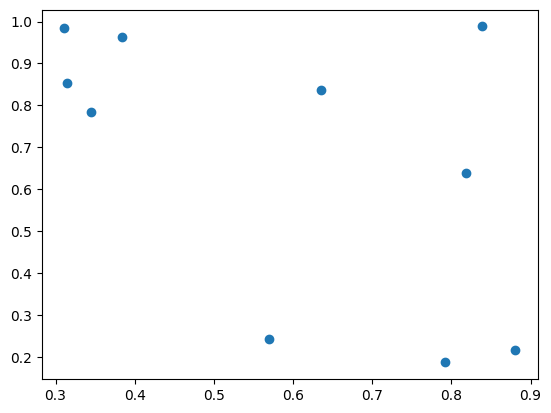

In [16]:
x = np.random.rand(10)
y = np.random.rand(10)

_ = plt.scatter(x, y)

Además de comparar dos serires de datos, también es posible asignar colores a cada uno de los puntos de la serie, ya sea para resaltar alguna de las propiedades de nuestros datos, o para representar una tercera dimensión mediante el color de cada punto. Para ello utilizaremos el parámetro `c` (de color).

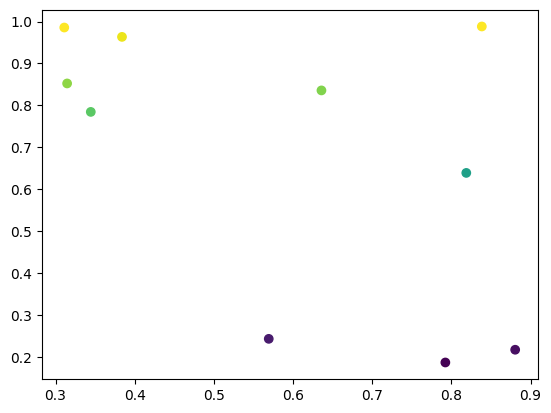

In [17]:
_ = plt.scatter(x, y, c=y)

También es posible definir por separado el tamaño de cada uno de los puntos en caso de querer resaltar alguna otra propiedad de los datos. Para ello utilizaremos el parámetro `s` (de *size*). Si este valor es un array, asignara un valor de tamaño diferente a cada punto de la serie, mientras que si es un `float` o un `int` eleccionaremos el mismo tamaño en todos los puntos.

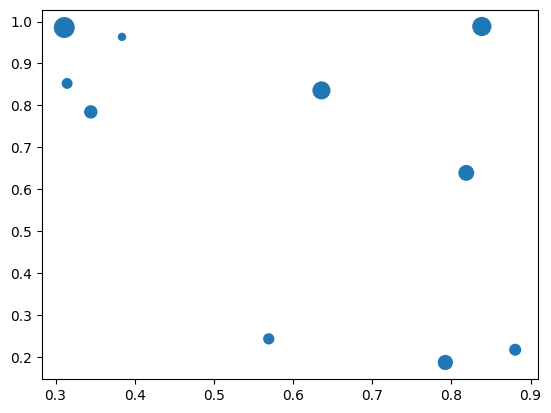

In [18]:
s = np.random.rand(10)*200

_ = plt.scatter(x, y, s=s)

Otra de las propiedades visuales de los puntos del scatterplot es el parámetro `alpha`, que controla la transparencia de los puntos del gráfico. Esta propiedad es útil cuando existe superposicion entre diferentes puntos, ya que ayuda a discriminar areas del gráfico con mucha densidad de puntos respecto de las menos densas.

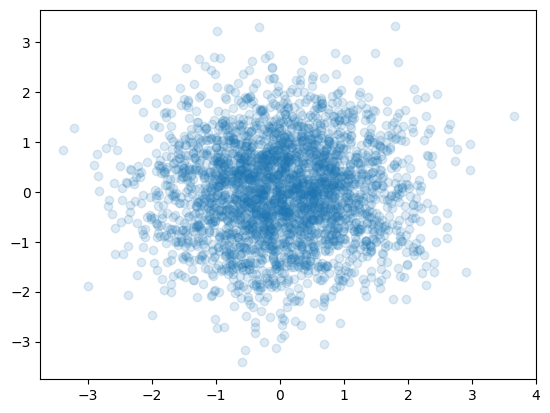

In [19]:
_ = plt.scatter(np.random.standard_normal(3000), np.random.standard_normal(3000), alpha=0.15)

## [6.](#Index) Ejercicios

### [6.1](#Index) Dibuja el precio histórico de bitcoin

Vamos a poner en práctica lo aprendido hasta ahora representando el historial de precios de Bitcoin en el periodo de tiempo seleccionado. Para ello usaremo

Para resolver el ejercicio, dibuja un gráfico con las siguientes propiedades:
1. Une todos los puntos mediantes una linea negra con estilo `dashed`.
2. Representa los diferentes valores de precios como puntos de diferente color según su variación porcentual diaria.
    * Variación positiva (ganancias)--> Verde
    * Variación negativa (pérdidas) --> Rojo

3. Añade un círculo amarillo en el centro de las muestras del cuartil de rango de precios superior (precio mayor precio max * 0.75).
4. Resalta los valores de la mitad superior de rango de precios con una franja azul con alpha = 0.1.
5. Añade un título y etiquetas en los ejes.

In [21]:
# Datos necesarios para el ejercicio
precio = bitcoin["Price"].values
precio_index = bitcoin.index.values

xticks_val = bitcoin.index.values[::10]
xticks_text = bitcoin.Date.map(lambda x: x.strftime("%d-%b-%Y"))[::10]

rets_positivo = bitcoin["Price"].pct_change() > 0 
rets_negativo = bitcoin["Price"].pct_change() < 0 
cambio_pos = bitcoin["Price"][rets_positivo].values.copy()
cambio_pos_index = bitcoin.index.values[rets_positivo]

cambio_neg = bitcoin["Price"][rets_negativo].values.copy()
cambio_neg_index = bitcoin.index.values[rets_negativo]

precio_maximo = bitcoin.Price.max()
precio_cuarto = bitcoin.Price.max() * 0.75
precio_mitad = bitcoin.Price.max() * 0.5



Aqui podéis ver el resultado final de como tiene que quedar el gráfico.

![](images/05_02b_plot.png)

In [ ]:
# %load solutions/05_bitcoins.py

### [6.2](#Index) Scatter plot de longitudes de pétalo y sépalo

Representa en un único scatter plot los tres tipos diferentes de iris y compara sus propiedades. Para ello mapea los parámtros del gráfico de la siguiente manera:
- **Eje x**: longitud de pétalo
- **Eje y**: longitud de sépalo
- **Tamaño del punto**: Ancho de pétalo * 75
- **Color**: Especie
- **Alpha**: 0.7


Primero crearemos arrays que contengan las columnas del dataframe con variables numéricas para todos los especímenes.

In [63]:
iris = pd.read_csv('data/04_01_iris.csv')
iris.columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]

setosa = ""
#= iris[iris["species"] == "setosa"]["sepal_length"].values
virginica = ""
#= iris[iris["species"] == "virginica"]["sepal_length"].values
pw_all = iris["petal_width"].values
pl_all = iris["petal_length"].values
sl_all = iris["sepal_length"].values
sw_all = iris["sepal_width"].values

Ahora crearemos un array que contendrá el nombre del color asignado a cada especie segun el siguiente diccionario:

In [66]:
color_dict = {"setosa": "blue",
             "virginica": "green",
             "versicolor": "orange"
            }
species = iris["species"].replace(color_dict).values


Así tiene que quedar el gráfico:
    ![](images/05_05_scatter.png)

In [68]:
# %load solutions/05_04_scatter.py


## Otras librerias de visualización

Además de `matplotlib`, Python cuenta con otras librerias de visualización de datos que también pueden resultar muy útiles, como por ejemplo:

- [Integración con pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html): Pandas incorpora una interfaz para visualizar datos de forma rápida utilizando matplotlib.
- [Seaborn](https://seaborn.pydata.org/): Basado en matplotlib, esta librería permite realizar plots de analisis estadístico de forma rápida y fácil, además de proporcionar estilos por defecto más cuidados que matplotlib. Por eso suele utilizarse para crear gráficos estilo matplotlib con una interfaz de "alto nivel".
- [Bokeh](https://bokeh.pydata.org/en/latest/): Permite crear gráficos interactivos en 2D mediante javascript, además de ofrecer utilidades para la representación de flujos de datos. Muy versatil y potente.
- [Plotly](https://plot.ly/): Este proyecto multiplataforma de código abierto permite crear todo tipo de gráficos interactivos de forma sencilla. Es la mejor librería para representar gráficos en 3D
- [Data Shader](http://datashader.org): Libreria que ofrece una interfaz de alto nivel para representar grandes cantidades de datos. Puede utilizar tanto `bokeh` como `matplotlib` como backend.